In [1]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from geopy.geocoders import Nominatim

## Data Wrangling


### Gathering

In [2]:
#load the dataset using pandas
df = pd.read_csv('robotex5.csv')
df.head()

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value
0,2022-03-06 15:02:39.329452000,59.407910,24.689836,59.513027,24.831630,3.51825
1,2022-03-10 11:15:55.177526000,59.441650,24.762712,59.426450,24.783076,0.50750
2,2022-03-06 14:23:33.893257000,59.435404,24.749795,59.431901,24.761588,0.19025
3,2022-03-03 09:11:59.104192000,59.406920,24.659006,59.381093,24.641652,0.75600
4,2022-03-06 00:13:01.290346000,59.434940,24.753641,59.489203,24.876170,2.27100


## Data Assessment

In [3]:
#explore the dataset
#check the dimension
df.shape

(627210, 6)

In [4]:
#check the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627210 entries, 0 to 627209
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   start_time  627210 non-null  object 
 1   start_lat   627210 non-null  float64
 2   start_lng   627210 non-null  float64
 3   end_lat     627210 non-null  float64
 4   end_lng     627210 non-null  float64
 5   ride_value  627210 non-null  float64
dtypes: float64(5), object(1)
memory usage: 28.7+ MB


In [5]:
#check the summary statistics
df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_value
count,627210.000000,627210.000000,627210.000000,627210.000000,627210.000000
mean,59.428682,24.743468,59.397797,24.724847,2.261384
std,0.021764,0.056872,1.392755,1.650709,44.889892
min,59.321557,24.505199,-37.819979,-122.453962,0.107628
25%,59.418803,24.713140,59.415215,24.707919,0.545250
50%,59.432069,24.744674,59.430697,24.744335,1.059000
75%,59.439024,24.768115,59.439262,24.773924,1.712000
max,59.566998,24.973743,61.552744,144.966110,3172.701000


In [6]:
#check for null values
df.isnull().sum()

start_time    0
start_lat     0
start_lng     0
end_lat       0
end_lng       0
ride_value    0
dtype: int64

In [7]:
df.duplicated().sum()

4564

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#inspect the ride value column
df.ride_value.sort_values(ascending=False).head(30)

191987    3172.701000
142420    2861.653025
362976    2861.651750
392267    2861.651750
475443    2861.573500
213786    2861.573500
217253    2861.573500
494555    2861.573500
617595    2861.573500
590387    2860.572750
269704    2860.572750
125747    2860.572750
334167    2860.572750
549705    2859.863250
407151    2859.863250
596018    2859.863250
153058    2859.863250
475859    2859.863250
606773    2859.858680
270832    2859.665816
219101    2859.651500
518365    2859.639250
58839     2859.603250
172472    2859.515250
199076    2859.456250
128906    2859.431250
458097    2859.431250
288786    2859.403500
152861    2859.379000
505370    2859.379000
Name: ride_value, dtype: float64

#### Insights

There are no null values, the data types are correct except for the start time



#### Corrections
- Change the data type of Start time to datetimeindex 
- Change the start time to the index
- Get the distance between both locations
- Get the name of the locations

## Cleaning

In [10]:
#change the datatype of start time
df['start_time'] = pd.to_datetime(df['start_time'])

In [11]:
#check for change
df.dtypes

start_time    datetime64[ns]
start_lat            float64
start_lng            float64
end_lat              float64
end_lng              float64
ride_value           float64
dtype: object

In [12]:
df.head()

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value
0,2022-03-06 15:02:39.329452,59.407910,24.689836,59.513027,24.831630,3.51825
1,2022-03-10 11:15:55.177526,59.441650,24.762712,59.426450,24.783076,0.50750
2,2022-03-06 14:23:33.893257,59.435404,24.749795,59.431901,24.761588,0.19025
3,2022-03-03 09:11:59.104192,59.406920,24.659006,59.381093,24.641652,0.75600
4,2022-03-06 00:13:01.290346,59.434940,24.753641,59.489203,24.876170,2.27100


In [13]:
#split start time into different dates and time
df['year'] = df['start_time'].dt.year
df['month'] = df['start_time'].dt.month
df['day'] = df['start_time'].dt.day
df['weekday'] = df['start_time'].dt.weekday
df['hour'] = df['start_time'].dt.hour

In [14]:
#change the start time to the index
df.set_index('start_time', inplace=True)

In [15]:
df.head()

,start_lat,start_lng,end_lat,end_lng,ride_value,year,month,day,weekday,hour
start_time,,,,,,,,,,
2022-03-06 15:02:39.329452,59.407910,24.689836,59.513027,24.831630,3.51825,2022,3,6,6,15
2022-03-10 11:15:55.177526,59.441650,24.762712,59.426450,24.783076,0.50750,2022,3,10,3,11
2022-03-06 14:23:33.893257,59.435404,24.749795,59.431901,24.761588,0.19025,2022,3,6,6,14
2022-03-03 09:11:59.104192,59.406920,24.659006,59.381093,24.641652,0.75600,2022,3,3,3,9
2022-03-06 00:13:01.290346,59.434940,24.753641,59.489203,24.876170,2.27100,2022,3,6,6,0


In [16]:
#create a function to calculate the distance
def dist_convert(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [17]:
#create the distance column and add it to the main dataframe
df['distance'] = dist_convert(df['start_lng'], df['start_lat'], df['end_lng'], df['end_lat'])
df.head()

,start_lat,start_lng,end_lat,end_lng,ride_value,year,month,day,weekday,hour,distance
start_time,,,,,,,,,,,
2022-03-06 15:02:39.329452,59.407910,24.689836,59.513027,24.831630,3.51825,2022,3,6,6,15,14.161756
2022-03-10 11:15:55.177526,59.441650,24.762712,59.426450,24.783076,0.50750,2022,3,10,3,11,2.043859
2022-03-06 14:23:33.893257,59.435404,24.749795,59.431901,24.761588,0.19025,2022,3,6,6,14,0.771782
2022-03-03 09:11:59.104192,59.406920,24.659006,59.381093,24.641652,0.75600,2022,3,3,3,9,3.033288
2022-03-06 00:13:01.290346,59.434940,24.753641,59.489203,24.876170,2.27100,2022,3,6,6,0,9.177383


In [18]:
df.distance.value_counts().sum()

622646

In [19]:
#view change
df.head()

,start_lat,start_lng,end_lat,end_lng,ride_value,year,month,day,weekday,hour,distance
start_time,,,,,,,,,,,
2022-03-06 15:02:39.329452,59.407910,24.689836,59.513027,24.831630,3.51825,2022,3,6,6,15,14.161756
2022-03-10 11:15:55.177526,59.441650,24.762712,59.426450,24.783076,0.50750,2022,3,10,3,11,2.043859
2022-03-06 14:23:33.893257,59.435404,24.749795,59.431901,24.761588,0.19025,2022,3,6,6,14,0.771782
2022-03-03 09:11:59.104192,59.406920,24.659006,59.381093,24.641652,0.75600,2022,3,3,3,9,3.033288
2022-03-06 00:13:01.290346,59.434940,24.753641,59.489203,24.876170,2.27100,2022,3,6,6,0,9.177383


In [20]:
df_new = df.copy()

##  Visualizations

#### Is there a correlation between ride value and distance?

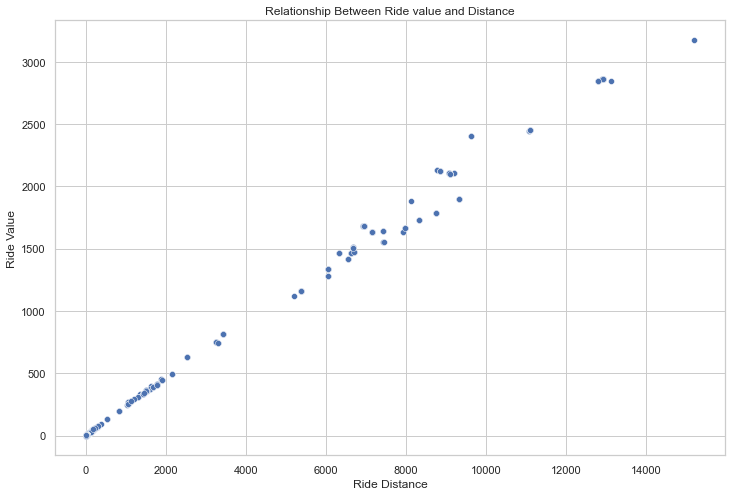

In [21]:
#plot a scatter plot to find the correlation between ride value and distance
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
sns.scatterplot(x='distance', y='ride_value', data=df_new)
plt.xlabel('Ride Distance')
plt.ylabel('Ride Value')
plt.title('Relationship Between Ride value and Distance');

From the above plot, it shows there is a positive correlation between ride value and distance. Shorter distances bring low pay while longer distances bring higher pay.

Next, using .corr(), determine the amount of positive between them

In [22]:
df_new[['ride_value', 'distance']].corr()

,ride_value,distance
ride_value,1.000000,0.998841
distance,0.998841,1.000000


Both have a very high positive correlation of 0.99

#### What days of the week have the highest demand for rides?

The data gotten is for the month of March for the year 2022

Next, analysis will be done to detect if specific days of the week have more requests for rides than others

In [23]:
#first find out if the days of the week starts from monday(1) or Monday(0)
df_new.weekday.unique()

array([6, 3, 2, 4, 5, 0, 1], dtype=int64)

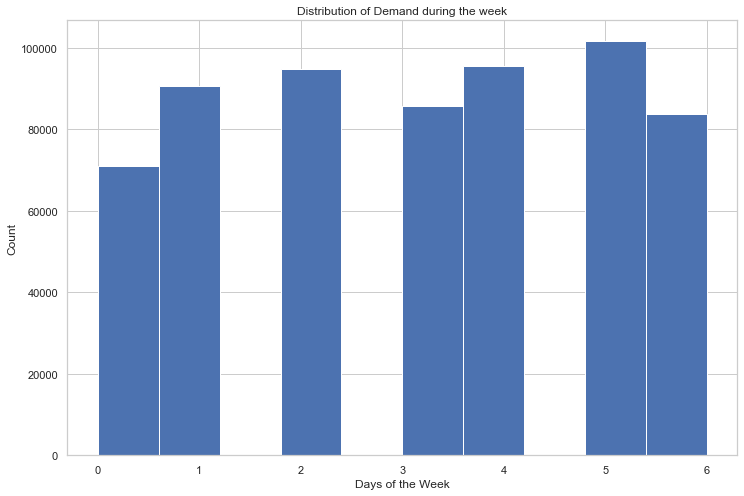

In [24]:
#plot using hist plot
df_new.weekday.plot(kind='hist', figsize=(12, 8))
plt.title('Distribution of Demand during the week')
plt.xlabel('Days of the Week')
plt.ylabel('Count');

C:\Users\Toyin Alade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weekday', ylabel='Density'>

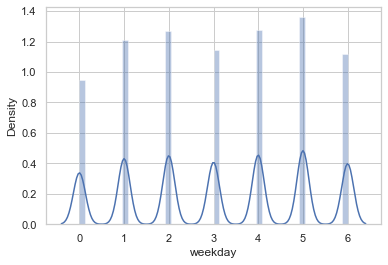

In [25]:
sns.distplot(df_new["weekday"])

Weekday 5 has the highest count of demand, which is Saturday in the month of March, 2022.

Next, the weekdays will be analysed by ranking to know the days with the highest demand in the month

In [26]:
df_new.weekday.value_counts()

5    101610
4     95506
2     94640
1     90616
3     85618
6     83610
0     71046
Name: weekday, dtype: int64

The next day of the week with a high demand after Saturday is Friday then Wednesday, with Monday having the least demand for rides in this month.

#### When was the longest ride and what was the route?

In [27]:
#find the longest distance traveled
df_new.distance.sort_values(ascending=False).head(1)

start_time
2022-03-22 00:43:30.985685    15212.719885
Name: distance, dtype: float64

In [28]:
long_ride = df_new.nlargest(1, 'distance')
long_ride

,start_lat,start_lng,end_lat,end_lng,ride_value,year,month,day,weekday,hour,distance
start_time,,,,,,,,,,,
2022-03-22 00:43:30.985685,59.436629,24.751962,-37.819979,144.96611,3172.701,2022,3,22,1,0,15212.719885


The longest ride was on the 22nd of March, 2022. The ride started at 12:43AM for 15212.7KM from 59.43lat, 24.75lng to -37.8lat, 166.96lng.

This ride was also the highest paid ride with a ride value of 3,172.701 Euro


#### What locations had the most orders in the month of March in Tallinn

Find the top five locations(where the rides started) that have the most orders

In [29]:
#find the longitude and latitude with the highest demand 
start_loc = df_new[['start_lat', 'start_lng']]

In [30]:
#use value count to get the locations with the highest number of counts
top_5 = start_loc.value_counts().head()
top_5

start_lat  start_lng
59.436705  24.782963    11
59.428552  24.765640    10
59.446983  24.732131    10
59.439357  24.761589    10
59.430689  24.721561    10
dtype: int64

These are the locations that had the highest demand for rides in march with 59.436705lat  24.782963long with the highest demand of 13 rides in March.

#### What days in the month of March had the highest trip amounts

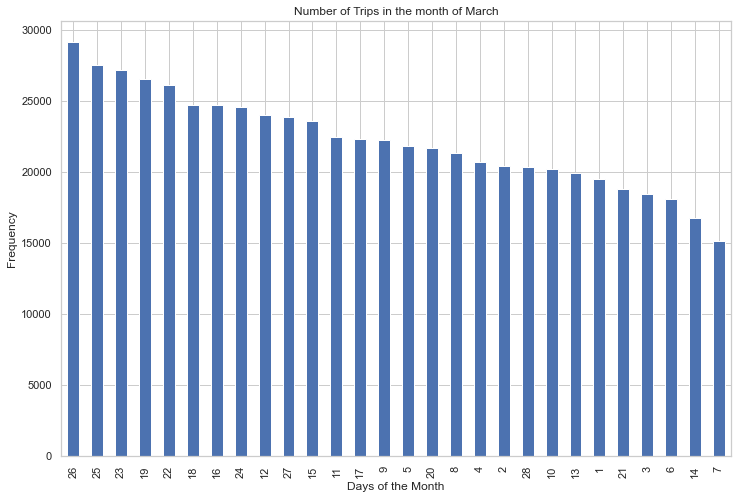

In [31]:
days = df_new.day.value_counts()
days.plot(kind='bar', figsize=(12,8))
plt.xlabel('Days of the Month')
plt.ylabel('Frequency')
plt.title('Number of Trips in the month of March');

C:\Users\Toyin Alade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

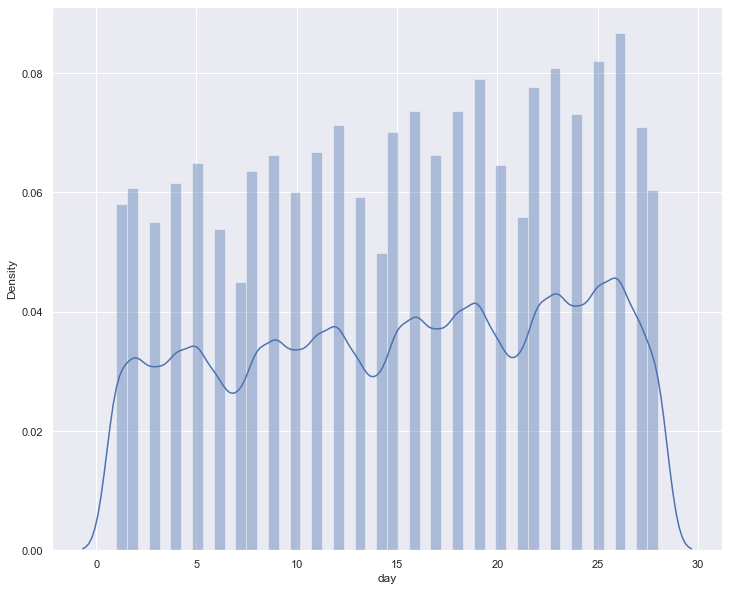

In [32]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(df_new["day"])

There was a high demand of rides on the 26th of March with 19th, 25th and 23rd following

#### What time is the busiest?
#### What time do people order rides the most?

In [33]:
#use the hour in the datetimeindex to get the busiest time of the day that orders are made
df_new.index.hour.value_counts()

16    38356
15    36291
14    34139
7     33625
22    32996
21    31398
17    30804
13    30282
6     30261
20    29119
18    27408
8     27375
19    26703
12    26382
23    25796
9     24486
11    23397
10    22985
5     20063
0     19525
1     15921
2     13175
4     11847
3     10312
Name: start_time, dtype: int64

From the above result it is evident that the hour with the highest order time or time of demand is 4PM 

Top 5 hours with the highest demand
4PM, 3PM, 2PM, 7AM and 10PM

From this, it can be suggested that at 4PM there is a high demand for rides and more suggestion will be given later.

Next, a bar plot will be used to visualize the top 5 high demand hours of the day in March, 2022

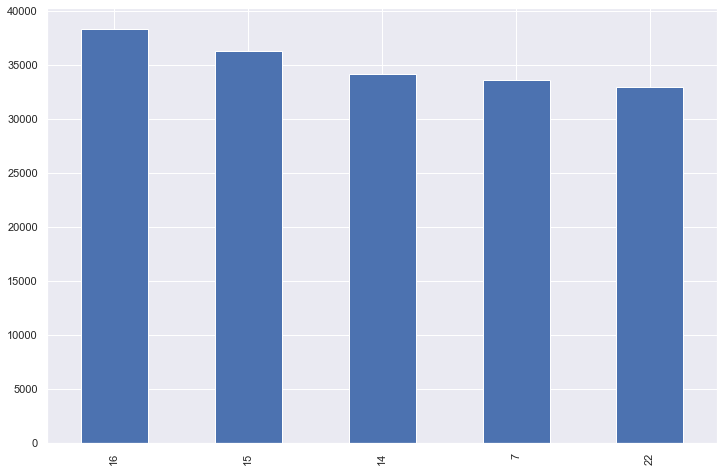

In [34]:
df_new.index.hour.value_counts(). head().plot(kind='bar', figsize=(12, 8));

C:\Users\Toyin Alade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

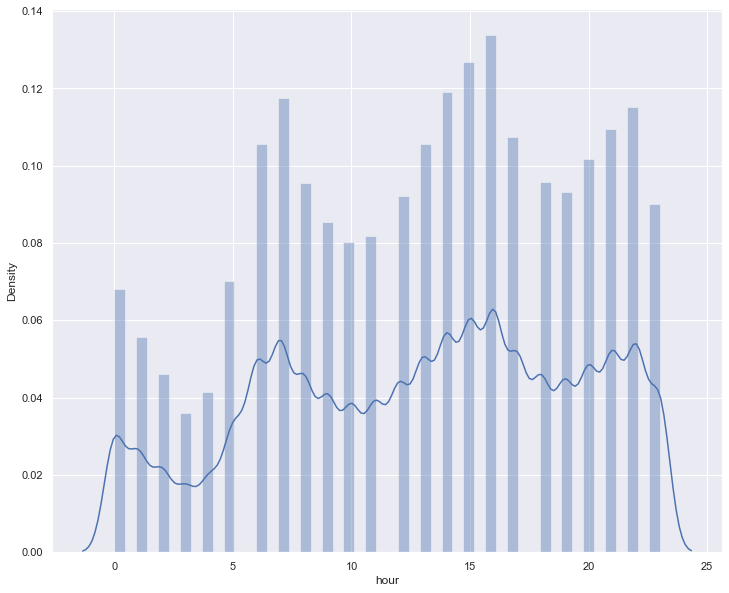

In [35]:
sns.distplot(df_new["hour"])

#### What locations had these high demands at 4PM, 3PM and 2PM 

In [36]:
#locations with the highest demand
first_hd = df_new[df_new.index.hour == 16]

#filter for the top 10 locations with high demand at 4PM
top_10_loc4 = first_hd[['start_lat', 'start_lng']].head(10)
top_10_loc4

,start_lat,start_lng
start_time,,
2022-03-17 16:20:20.028387,59.410783,24.721219
2022-03-21 16:07:28.519745,59.444390,24.742565
2022-03-08 16:30:59.582078,59.443281,24.733840
2022-03-28 16:00:32.111964,59.437785,24.745797
2022-03-04 16:36:00.165324,59.404348,24.731202
2022-03-04 16:35:21.226865,59.414473,24.816553
2022-03-27 16:43:30.304254,59.405625,24.660659
2022-03-04 16:17:03.533061,59.437875,24.743284
2022-03-06 16:29:27.735240,59.444928,24.580780


##### Location at 3PM

In [37]:
#locations with the highest demand
second_hd = df_new[df_new.index.hour == 15]

#filter for the top 10 locations with high demand at 4PM
top_10_loc3 = second_hd[['start_lat', 'start_lng']].head(10)
top_10_loc3

,start_lat,start_lng
start_time,,
2022-03-06 15:02:39.329452,59.407910,24.689836
2022-03-21 15:07:27.953983,59.380472,24.629802
2022-03-27 15:15:35.916686,59.421678,24.791646
2022-03-02 15:00:45.350774,59.396511,24.669324
2022-03-14 15:47:18.248769,59.429136,24.740953
2022-03-07 15:19:17.755124,59.431065,24.757161
2022-03-22 15:06:53.978190,59.433616,24.721355
2022-03-12 15:00:24.552000,59.425967,24.702978
2022-03-23 15:42:51.398052,59.480313,24.850347


In [38]:
#locations with the highest demand
third_hd = df_new[df_new.index.hour == 14]

#filter for the top 10 locations with high demand at 4PM
top_10_loc2 = third_hd[['start_lat', 'start_lng']].head(10)
top_10_loc2

,start_lat,start_lng
start_time,,
2022-03-06 14:23:33.893257,59.435404,24.749795
2022-03-18 14:34:56.333676,59.416808,24.799002
2022-03-18 14:55:55.179753,59.429649,24.749386
2022-03-21 14:59:10.209000,59.422318,24.801615
2022-03-12 14:46:15.752749,59.433539,24.753116
2022-03-02 14:46:13.159422,59.431161,24.760291
2022-03-21 14:49:20.575000,59.389723,24.687836
2022-03-12 14:11:41.551000,59.436310,24.777791
2022-03-28 14:29:24.247406,59.420749,24.813656


## Brief Summary

From the above analysis, it is safe to say that most trips or rides were made on Saturdays, having the 26th of March as the day with the highest amount of rides done. Most rides had high demands at 4PM, so demand was really high by 4PM. Other high demand times were 2PM and 3PM. The time in the morning that had a high morning hour rush was 7AM, this could be due to the rush to resume work on time or meet up with early morning appointments, so people tend to order for rides by 7AM.

4PM can be assumed to be the rush hour as people tend to wrap up activities for the day, hence the high demand for rides. 2PM and 3PM also have high demands but not as high as 4PM, why? It could be because some people might want to reach places before the rush hour or it is just a time before the rush hour so there is a build up of activities among people.

Above is a list of locations that have shown to experience high demand by 4PM, 3PM and 2PM.

Riders should focus on these areas because through this analysis, it has been shown that they will improve demand and supply of rides. More riders should be situated in these areas at times when there is a high demand, like Saturdays by 4PM, riders should be around ........... to get customers faster.

Next, a model will be built to forcast the above claim

## Building the model

In [39]:
df_new.dtypes

start_lat     float64
start_lng     float64
end_lat       float64
end_lng       float64
ride_value    float64
year            int64
month           int64
day             int64
weekday         int64
hour            int64
distance      float64
dtype: object

In [40]:
df_new.shape

(622646, 11)

In [41]:
X = df_new.drop(['year', 'month'], axis=1)
y = df_new['hour']